# Pymaceuticals Inc.
---

### Analysis

- A positive correlation coefficient suggests that as mouse weight increases, the average tumor volume also tends to increase, while a negative correlation coefficient would indicate the opposite.

- Mouse ID l509's negative slope of the regression line indicates that the average tumor volume decreases during the treatment period. This suggests that the Capomulin treatment may be effective in reducing tumor size.

- The analysis identified potential outliers in the tumor volume data for certain drug regimens. These outliers may represent unusual responses to treatment and could be further investigated to understand their impact on the overall results.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_count = len(study_df['Mouse ID'].unique())
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_mice = duplicate_mice[duplicate_mice['count'] > 1]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_df[study_df['Mouse ID'] == 'g989']
duplicate_mouse_data.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.drop(duplicate_mouse_data.index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mice_count = len(clean_df['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_value = summary_stats.mean()
median_value = summary_stats.median()
var_value = summary_stats.var()
std_value = summary_stats.std()
sem_value = std_value / summary_stats.count()**0.5

summary_stats_df = pd.DataFrame({'Mean Tumor Volume': mean_value, 'Median Tumor Volume': median_value, 'Tumor Volume Variance': var_value,
                                           'Tumor Volume Std. Dev.': std_value, 'Tumor Volume Std. Err.': sem_value})
summary_stats_df.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

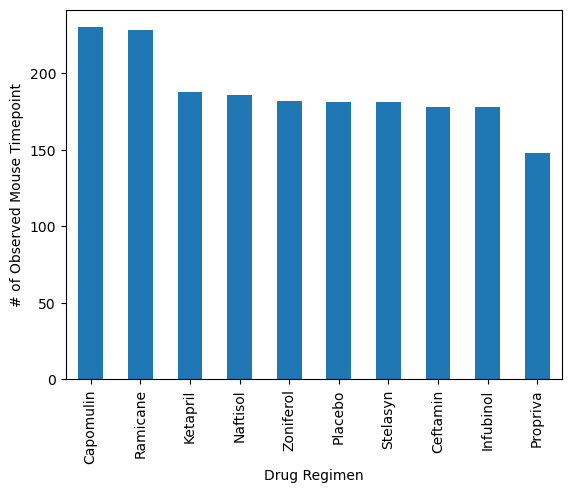

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_df = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
bar_df.plot(kind='bar', rot=90, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoint')
plt.show()

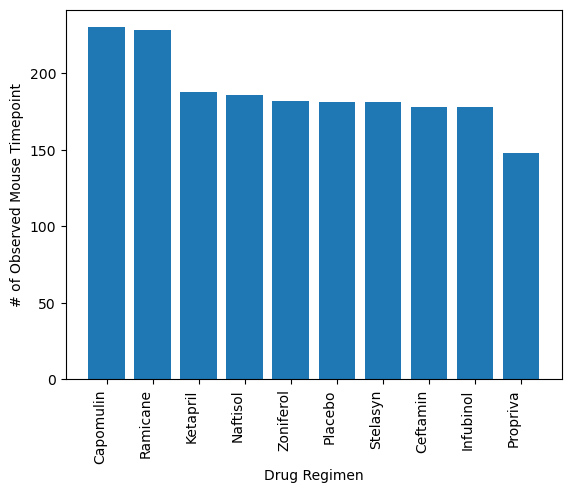

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_df = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
plt.bar(bar_df.index, bar_df, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.xticks(rotation=90, ha='right')
plt.show()

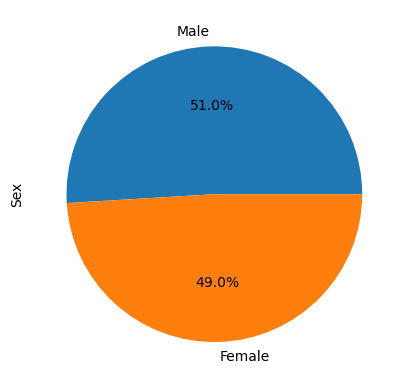

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_gender = clean_df['Sex'].value_counts()
pie_gender.plot(kind='pie', y="Sex", autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

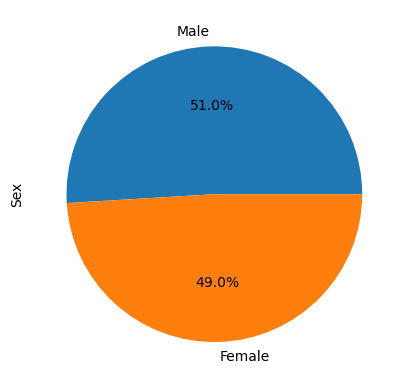

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender = clean_df['Sex'].value_counts()
plt.pie(pie_gender, autopct='%1.1f%%', labels=pie_gender.index)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourregimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fourregimens_df = clean_df[clean_df['Drug Regimen'].isin(fourregimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#fourregimens is my list (above)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in fourregimens:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    tumor_volume = treatment_data['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    potential_outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                                        (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    # add subset
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    print(f"{treatment}'s potencila outliers: {potential_outliers['Tumor Volume (mm3)']}")
    

Capomulin's potencila outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potencila outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potencila outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potencila outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


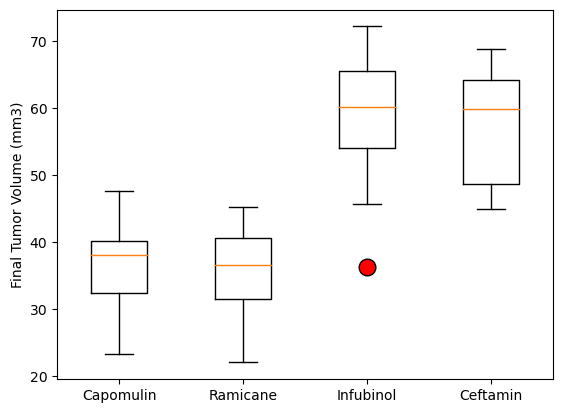

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=fourregimens, flierprops=dict(marker='o', markerfacecolor='red',markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

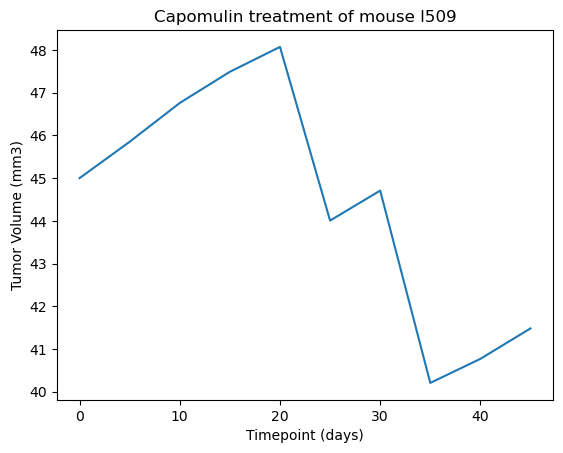

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]
plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

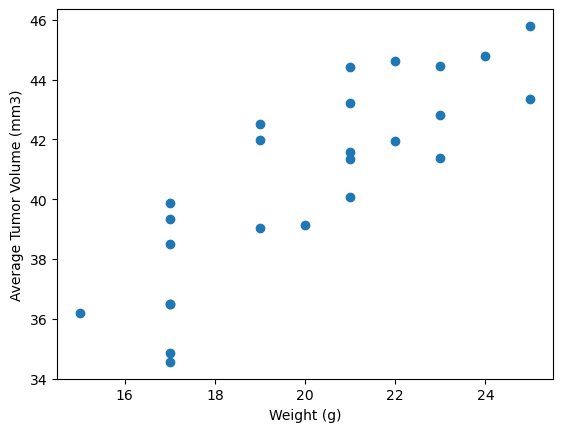

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = all_capomulin_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


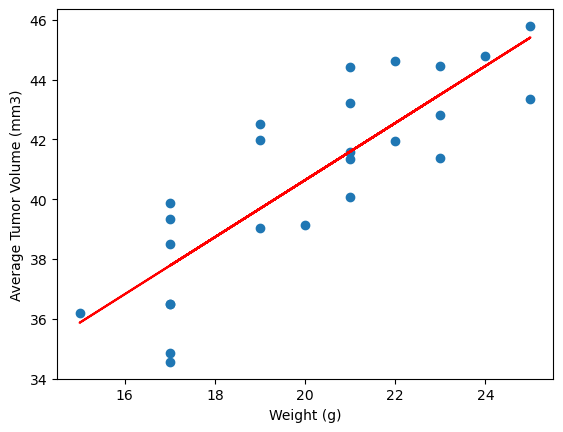

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
correlation_coefficient = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume['Weight (g)'], slope * avg_tumor_volume['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()